# Import KBase and cFBA

In [1]:
# import kbase
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path
import cobrakbase
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase = cobrakbase.KBaseAPI(token_file.readline())

# ecoli = kbase.get_from_ws("iML1515",76994)
ah991 = kbase.get_from_ws("iAH991V2", 93832)
pf = kbase.get_from_ws("iSB1139.kb.gf",30650)

# import cFBA
# %run ../../modelseedpy/community/mscommunity.py
# %matplotlib inline

cobrakbase 0.2.8


# construct the community model

In [7]:
%run ../../modelseedpy/community/commhelper.py

comm_model = build_from_species_models([ah991, pf], cobra_model=True)

modelseedpy.community.mscompatibility - ERROR - The Bacteroides_thetaiotaomicron_VPI-5482.fbamdl.23 model has residual non-standard metabolites in its exchange reactions: {'pe_cer1_bt_e0', 'hspg_degr_12_e0', 's2l2n2m2m_e0', 'alagly_e0', 'fucneulacnhx_e0', 'chtbs_e0', 'glypro_e0', 'hspg_degr_7_e0', 'hspg_rest_e0', 'gncore2_e0', 'lacnfucpt_e0', 'amannan140_e0', 'Ser_Thr_e0', 'ha_deg1_e0', 'isoval_e0', 'glyglu_e0', 'sT_antigen_e0', 'hspg_degr_8_e0', 'cspg_b_e0', 'hspg_degr_15_e0', 'hspg_degr_5_e0', 'hspg_degr_13_e0', '2omfuc_e0', 'T_antigen_e0', 'mqn10_e0', 'lacnnttr_e0', 'gam26s_e0', 'levanttr_e0', 'unsdigalur_e0', '3fuclac_e0', 'kestottr_e0', 'core3_e0', '3ddlhept_e0', 'plac_e0', 'cspg_c_e0', 'isobut_e0', 'arabinan101_e0', 'Tn_antigen_e0', 'alaglu_e0', 'l2n2m2mn_e0', 's2l2fn2m2masn_e0', 'glyasn_e0', 'arabinogal_e0', 'kestopt_e0', 'manpt_e0', 'gncore1_e0', 'cspg_b_degr_e0', 'core2_e0', 'levan1000_e0', '2omxyl_e0', 'sTn_antigen_e0', 'core7_e0', 'core6_e0', 'apio_D_e0', 'glycogen1500_e0', 




Align exchange reactions in Bacteroides_thetaiotaomicron_VPI-5482.fbamdl.23 


modelseedpy.community.mscompatibility - ERROR - The iSB1139 model has residual non-standard metabolites in its exchange reactions: {'r277_e0', 'r1423_e0', 'r505_e0', 'r1262_e0', 'r1535_e0', 'r1400_e0'}. Specify a True `printing` parameter to view why these metabolites were not corrected.





Align exchange reactions in iSB1139 


{'original': {'id': 'r307_e0', 'name': 'Mn2+'},
 'new': {'id': 'cpd00030_e0', 'name': 'Mn2+_e0'},
 'justification': 'The r307_e0 and cpd00030_e0 distinction in iSB1139 is '
                  'incompatible; hence, the cpd00030_e0 ID and Mn2+_e0 are '
                  'used. The r307_e0 ID is not a ModelSEED Database ID.'}


{'original': {'id': 'r293_e0', 'name': 'Fe2+'},
 'new': {'id': 'cpd10515_e0', 'name': 'Fe2+_e0'},
 'justification': 'The r293_e0 and cpd10515_e0 distinction in iSB1139 is '
                  'incompatible; hence, the cpd10515_e0 ID and Fe2+_e0 are '
                  'used. The r293_e0 ID is not a ModelSEED Database ID.'}


0 exchange reactions were substituted and 0 exchange metabolite IDs were redefined by align_exchanges().
cpd11416_c1 Bacteroides_thetaiotaomicron_VPI-5482.fbamdl.23

 ('12ETHDt', 'c', '0')
12ETHDt_c 12ETHDt_c1

 ('12PPDRt', 'c', '0')
12PPDRt_c 12PPDRt_c1

 ('12PPDt', 'c', '0')
12PPDt_c 12PPDt_c1

 ('23PDE

In [ ]:
from cobra.io import load_json_model
ecoli_json = load_json_model("../../../../ProjectNotebooks/CommunityModeling/CommFitting/ecoli.json")
pf_json = load_json_model("../../../../ProjectNotebooks/CommunityModeling/CommFitting/pf.json")

In [7]:
ecoli.reactions.bio1

Reaction identifier,bio1
Name,R_BIOMASS_Ec_iML1515_core_75p37M (E. coli biomass objective function (iML1515) - core - with...
Memory address,0x1e29051f0a0
Stoichiometry,70.028756 cpd00001_c0 + 75.55223 cpd00002_c0 + 0.001831 cpd00003_c0 + 0.000447 cpd00006_c0 + 0.000576 cpd00010_c0 + 0.013013 cpd00013_c0 + 0.000223 cpd00015_c0 + 0.000223 cpd00016_c0 + 0.000223... 70.028756 H2O_c0 + 75.55223 ATP_c0 + 0.001831 NAD_c0 + 0.000447 NADP_c0 + 0.000576 CoA_c0 + 0.013013 NH3_c0 + 0.000223 FAD_c0 + 0.000223 Pyridoxal phosphate_c0 + 0.000223 S-Adenosyl-L-methionine_c0...
GPR,
Lower bound,0
Upper bound,1000


### Examine the community model

In [3]:
# print(dir(model.objective))
display(model.objective.expression)
display(model.reactions.bio1)

1.0*bio1 - 1.0*bio1_reverse_b18f7

Reaction identifier,bio1
Name,bio1
Memory address,0x21872a385e0
Stoichiometry,0.5 cpd11416_c1 + 0.5 cpd11416_c2 --> cpd11416_c0 0.5 Biomass_c0 + 0.5 Biomass --> Community biomass
GPR,
Lower bound,0
Upper bound,100


In [12]:
print([rxn.id for rxn in comm_model.reactions if "bio" in rxn.id])
print("ah991\t", ah991.optimize())
print("pf\t", pf.optimize())
print("community\t", comm_model.optimize())

['bio3', 'bio2', 'bio1']
ah991	 <Solution 86.916 at 0x1516468a100>
pf	 <Solution 22.213 at 0x1516468a310>
community	 <Solution 0.000 at 0x1516468aa30>


In [10]:
print([rxn.id for rxn in ah991.reactions if re.search(r"_c\d", rxn.id)]) # "compartment" in dir(rxn) and "c" in rxn.compartment])
print("\n\n")
print([rxn.id for rxn in comm_model.reactions if re.search(r"_c\d", rxn.id)]) # "compartment" in dir(rxn) and "c" in comm_model.reactions])

['12ETHDt_c0', '12PPDRt_c0', '12PPDt_c0', '23PDE2_c0', '23PDE4_c0', '23PDE7_c0', '23PDE9_c0', '26DAPLLATi_c0', '2AMEPHPAT_c0', '2FUCLAC__DASH__FUCASEe_c0', '2MBCOATA_c0', '2MMALD_c0', '2MMALD2_c0', '3DSPHR_c0', '3FUCLAC__DASH__FUCASEe_c0', '3HACPR1_c0', '3HACPR2_c0', '3HAD100_c0', '3HAD10M11_c0', '3HAD10M12_c0', '3HAD11M12_c0', '3HAD120_c0', '3HAD121_c0', '3HAD12M13_c0', '3HAD12M14_c0', '3HAD13M14_c0', '3HAD140_c0', '3HAD141_c0', '3HAD14M15_c0', '3HAD14M16_c0', '3HAD15M16_c0', '3HAD160_c0', '3HAD161_c0', '3HAD180_c0', '3HAD181_c0', '3HAD40_c0', '3HAD4M5_c0', '3HAD4M6_c0', '3HAD5M6_c0', '3HAD60_c0', '3HAD6M7_c0', '3HAD6M8_c0', '3HAD7M8_c0', '3HAD80_c0', '3HAD8M10_c0', '3HAD8M9_c0', '3HAD9M10_c0', '3OAACPR1_c0', '3OAACPR2_c0', '3OAR100_c0', '3OAR10M11_c0', '3OAR10M12_c0', '3OAR11M12_c0', '3OAR120_c0', '3OAR121_c0', '3OAR12M13_c0', '3OAR12M14_c0', '3OAR13M14_c0', '3OAR140_c0', '3OAR141_c0', '3OAR14M15_c0', '3OAR14M16_c0', '3OAR15M16_c0', '3OAR160_c0', '3OAR161_c0', '3OAR180_c0', '3OAR181_

# Exchanges equality

In [14]:
total_exchanges = set([rxn.id for rxn in ah991.reactions if re.search(r"_e\d", rxn.id)]+[rxn.id for rxn in pf.reactions if re.search(r"_e\d", rxn.id)])
print("\n\n")
print([rxn.id for rxn in comm_model.reactions if re.search(r"_e\d", rxn.id) and rxn.id not in total_exchanges]) # "compartment" in dir(rxn) and "c" in comm_model.reactions])




[]


In [16]:
print(len(total_exchanges))
print(len([rxn.id for rxn in comm_model.reactions if re.search(r"_e\d", rxn.id)]))

429
429


In [11]:
for rxn in comm_model.reactions:
    if "bio" in rxn.id:
        print(rxn.reaction)

0.171 cpd00002_c2 + 0.00215 cpd00003_c2 + cpd00004_c2 + 0.0004 cpd00005_c2 + 0.00013 cpd00006_c2 + cpd00010_c2 + cpd00015_c2 + 0.001 cpd00018_c2 + cpd00022_c2 + 0.25 cpd00023_c2 + 0.003 cpd00026_c2 + 0.582 cpd00033_c2 + 0.488 cpd00035_c2 + 0.203 cpd00038_c2 + 0.326 cpd00039_c2 + 0.229 cpd00041_c2 + 0.281 cpd00051_c2 + 0.126 cpd00052_c2 + 0.25 cpd00053_c2 + 0.18759 cpd00054_c2 + 0.146 cpd00060_c2 + 0.136 cpd00062_c2 + 0.054 cpd00065_c2 + 0.176 cpd00066_c2 + 0.131 cpd00069_c2 + cpd00078_c2 + 0.087 cpd00084_c2 + 0.428 cpd00107_c2 + 0.0247 cpd00115_c2 + 0.032027 cpd00118_c2 + 0.09 cpd00119_c2 + 0.21 cpd00129_c2 + 0.229 cpd00132_c2 + 0.402 cpd00156_c2 + 0.241 cpd00161_c2 + 0.0254 cpd00241_c2 + 0.276 cpd00322_c2 + 0.0254 cpd00356_c2 + 0.0247 cpd00357_c2 + 0.0005 cpd00557_c2 + 0.0005 cpd11313_c2 + 0.0005 cpd15425_c2 + 0.0005 cpd15428_c2 + 0.0005 cpd15429_c2 + 0.0005 cpd15430_c2 + 0.0005 cpd15431_c2 + 0.0005 cpd15433_c2 + 0.0005 cpd15434_c2 + 0.0005 cpd15435_c2 + 0.0005 cpd15436_c2 + 0.0005 cp

# 2-member Zahmeeth model

## Unconstained model

### Define and execute the model

cpd11416_c0
bio1: 0.5 cpd11416_c1 + 0.5 cpd11416_c2 --> cpd11416_c0
primary biomass defined bio1: 0.5 cpd11416_c1 + 0.5 cpd11416_c2 --> cpd11416_c0
SK_cpd11416_c0: cpd11416_c0 --> 
cpd11416_c1
cpd11416_c2
cpd11416_c1
c1
cpd11416_c2
c2


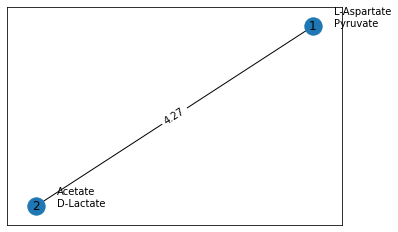

,Environment,Species1,Species2
Metabolite/Donor ID,,,
12ethd_e0,-0.001642,0.000000,0.001642
cpd00001_e0,-2.799308,-3.746002,6.545311
cpd00009_e0,0.237455,-0.083800,-0.153655
cpd00011_e0,-3.820114,6.134485,-2.314372
cpd00013_e0,1.933339,-0.310906,-1.622432
...,...,...,...
pe_cer1_bt_e0,0.000000,0.000000,0.000406
sphmyln_bt_e0,0.000000,0.000000,0.000406
zzEnvironment,0.000000,2.044444,5.196018


,Environment,Species1,Species2
Donor ID,,,
Environment,,D-Glucose; NH3,Phosphate; D-Glucose; NH3
Species1,H2; Acetate; CO2; H+,,L-Aspartate; Pyruvate
Species2,H2; Succinate; H2O; H+,D-Lactate; Acetate,


In [2]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["CMM_iAH991V2_iML1515.kb",40576]
mediaInfo_2 = ["Btheta_Ecoli_minimal_media",40576]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
%run ../../modelseedpy/community/mscommunity.py
cfba = MSCommunity(model)
cfba.gapfill(media)
sol = cfba.run(media)
cross_feeding, exMets = cfba.steadycom(solution=sol, flux_threshold=.1)
display(cross_feeding)
display(exMets)

## FullThermo-constrained model

### Define and execute the model

In [ ]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["CMM_iAH991V2_iML1515.kb",40576]
mediaInfo_2 = ["Btheta_Ecoli_minimal_media",40576]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
%run ../../modelseedpy/community/mscommunity.py
cfba = MSCommunity(model)
cfba.gapfill(media)
cfba.constrain(msdb_path = "../../../ModelSEEDDatabase")
sol = cfba.run(media)
cross_feeding, exMets = cfba.steadycom(solution=sol, flux_threshold=.1)
display(cross_feeding)
display(exMets)

cpd11416_c0
bio1: 0.5 cpd11416_c1 + 0.5 cpd11416_c2 --> cpd11416_c0
primary biomass defined bio1: 0.5 cpd11416_c1 + 0.5 cpd11416_c2 --> cpd11416_c0
SK_cpd11416_c0: cpd11416_c0 --> 
cpd11416_c1
cpd11416_c2
cpd11416_c1
c1
cpd11416_c2
c2


# 3-member Electrosynth model

## Unconstrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
species 1 drain-flux objective value: 2.066246891916704
species 2 drain-flux objective value: 6.182228448150425
species 3 drain-flux objective value: 6.145662130043192

Model objective value: 3.766216581357344



Production matrix:
                1            2            3
Donor                                      
1        0.000000   526.567332   681.068788
2      615.130758     0.000000  2492.677015
3      145.763634  2307.900404     0.000000


Consumption matrix:
                   1            2            3
Receiver                                      
1           0.000000   615.130758   145.763634
2         526.567332     0.000000  2307.900404
3         681.068788  2492.677015     0.000000




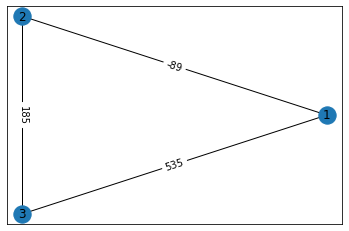

In [4]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
species 1 drain-flux objective value: 2.066246891916704
species 2 drain-flux objective value: 6.182228448150425
species 3 drain-flux objective value: 6.145662130043192

Model objective value: 0.0



Production matrix:
         1    2    3
Donor               
1      0.0  0.0  0.0
2      0.0  0.0  0.0
3      0.0  0.0  0.0


Consumption matrix:
            1    2    3
Receiver               
1         0.0  0.0  0.0
2         0.0  0.0  0.0
3         0.0  0.0  0.0




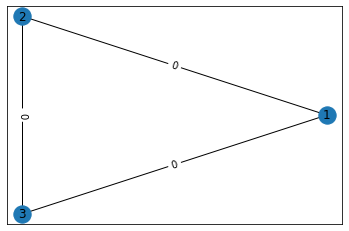

In [5]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# 2-member Aimee model

## Unconstrained model

### Chitin media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0




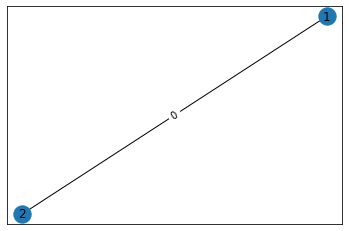

In [6]:
# import the model
%run ../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media) 
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0




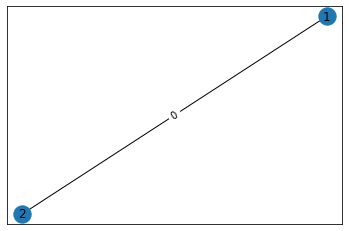

In [7]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# 7-member Hotlake model

## Unconstrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
Making biomass drain: cpd11416_c4
Making biomass drain: cpd11416_c5
Making biomass drain: cpd11416_c6
Making biomass drain: cpd11416_c7
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0
species 3 drain-flux objective value: 0.0
species 4 drain-flux objective value: 0.0
species 5 drain-flux objective value: 0.0
species 6 drain-flux objective value: 0.0
species 7 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2    3    4    5    6    7
Donor                                   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0
5      0.0  0.0  0.0  0.0  0.0  0.0  0.0
6      0.0  0.0  0.0  0.0  0.0  0.0  0.0
7      0.0  0.0  0.0  0.0  0.0  0.0  0.0


Consumption matrix:
            1    2    3    4    5    6    7
Receiver                                   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0
6         0.0  0.0  0.0  0.0  0.0  0.0  0.0
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0




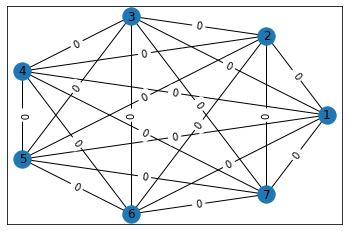

In [8]:
# import the model
%run ../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["Hot_Lake_seven.mdl",93544]
mediaInfo_2 = ["HotLakeMedia",93544]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

In [ ]:
# import the model
%run ../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["Hot_Lake_seven.mdl",93544]
mediaInfo_2 = ["HotLakeMedia",93544]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
Making biomass drain: cpd11416_c4
Making biomass drain: cpd11416_c5
Making biomass drain: cpd11416_c6
Making biomass drain: cpd11416_c7
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0
species 3 drain-flux objective value: 0.0
species 4 drain-flux objective value: 0.0
species 5 drain-flux objective value: 0.0
species 6 drain-flux objective value: 0.0
species 7 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

